# Spørreundersøkelse resultater #

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


## funksjoner ##

###

In [3]:



# Function to extract minutes and seconds
def extract_minutes(x):
    words = x.split()
    if len(words) == 2:
        return int(words[0])
    else:
        minutes = int(words[0])
        seconds = int(words[2])
        if seconds >= 30:
            minutes += 1
        return minutes
    
#Funksjon for å kalkulere antall prosent riktige svar
def correct_answers(df,coloumn):
    df = df.replace({0:1, 1:0, 2:0, 3:0, 4:0}) #

    # calculate the mean 
    mean = df[coloumn].mean()

    # calculate the median
    median = df[coloumn].median()

    # calculate the standard deviatio
    std = df[coloumn].std()
    prosent = round(mean*100,2)
    # print the results
    print('Riktige svar:', prosent,'%')
    
    return prosent,df
    #print('Median:', median)
    #print('Standard Deviation:', std)


### Lese alle resultatene inn i panda dataframes ###

In [8]:
# Read the UTF-8 encoded text file into a data frame
df = pd.read_csv('D:\OneDrive - NTNU\Skule\masteroppgave\data-332306-2023-04-13-1510-utf.txt', sep='\t', encoding='utf-8')

print(df)

# Split the data into separate data frames based on the question
NR_df = df[['NR']]
bransje_df = df[['bransje']]
alder_df = df[['alder']]
kartbruk_df = df[['kartbruk']]
studererntnu_df = df[['studererntnu']]
fakultet_df = df[['fakultet']]
geografiskinformasjonsbehandling_df = df[['geografiskinformasjonsbehandling']]
BILDE_NR_1_df = df[['BILDE NR. 1']]
BILDE_NR_2_df = df[['BILDE NR.2']]
BILDE_NR_3_df = df[['BILDE NR.3']]
BILDE_NR_4_df = df[['BILDE NR.4']]
verneomrade_df = df[['verneomrade']]
drikkevannskilde_df = df[['drikkevannskilde']]
tbane_df = df[['tbane']]
aapenthusvaer_df = df[['aapenthusvaer']]
hunndeloeype_df = df[['hunndeloeype']]
gapahuk_df = df[['gapahuk']]
helsestasjon_df = df[['helsestasjon']]
kulturhus_df = df[['kulturhus']]
politi_df = df[['politi']]
rundtur_df = df[['rundtur']]
utsiktspunkt_df = df[['utsiktspunkt']]
gruve_df = df[['gruve']]
baandtvang_df = df[['baandtvang']] #Tekstsvar
droneforbudt_df = df[['droneforbudt']] #TEKSTSVAR
baattrafikk_df = df[['baattrafikk']]
tidevannsstrom_df = df[['tidevannsstrom']]
generelle_komment_df = df[['Om du har noen generelle kommentarer til forbedringspotensiale av kart/skiltsymboler, skriv de gjerne her!']] #TEKSTSVAR
svartid_df = df[['Svartid']]


sporsmål_list = ['verneomrade', 'drikkevannskilde', 'tbane', 'aapenthusvaer', 'hunndeloeype', 'gapahuk', 'helsestasjon', 'kulturhus', 'politi', 'rundtur', 'utsiktspunkt', 'gruve', 'baattrafikk', 'tidevannsstrom','droneforbudt','baandtvang','cyclocross','terrengsykling','tursykling','utforsykling']


           NR                bransje  alder  kartbruk  studererntnu  fakultet   
0    26616135                      2      3         1           NaN       NaN  \
1    26616272                      1      3         3           1.0       2.0   
2    26616283                      4      2         2           NaN       NaN   
3    26616314                      2      3         2           NaN       NaN   
4    26616348                      2      3         1           NaN       NaN   
..        ...                    ...    ...       ...           ...       ...   
122  26663152                      2      3         1           NaN       NaN   
123  26682832                      2      6         3           NaN       NaN   
124  26689685                      6      3         3           NaN       NaN   
125  26734954  Ingen av de overnevte      3         1           NaN       NaN   
126  26788318  Ingen av de overnevte      4         3           NaN       NaN   

     geografiskinformasjons

## DATAFILTRERING ##

In [10]:
# Filtrere bort personer som studerte geografisk informasjonsbehandling

df['Svartid'] = df['Svartid'].apply(lambda x: extract_minutes(x))

print(df['Svartid'])

#df_filtered = df[df['geografiskinformasjonsbehandling'] != df['geografiskinformasjonsbehandling']]
#print(df_filtered)
#print("Filtrerte bort", len(df)-len(df_filtered), "av", len(df), "deltakere")

#df_filtered = df[df['Svartid'] >= 5 ]
#print("Beholdt", len(df_filtered), "av", len(df), "deltakere i filtrert dataframe")



0      3
1      7
2      4
3      4
4      5
      ..
122    5
123    9
124    6
125    5
126    9
Name: Svartid, Length: 127, dtype: int64


### Visualisere svartid brukt ###

C:\Users\sondr\AppData\Local\Temp\ipykernel_7104\2296171223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svartid_df['Svartid_min'] = svartid_df['Svartid'].apply(lambda x: extract_minutes(x))


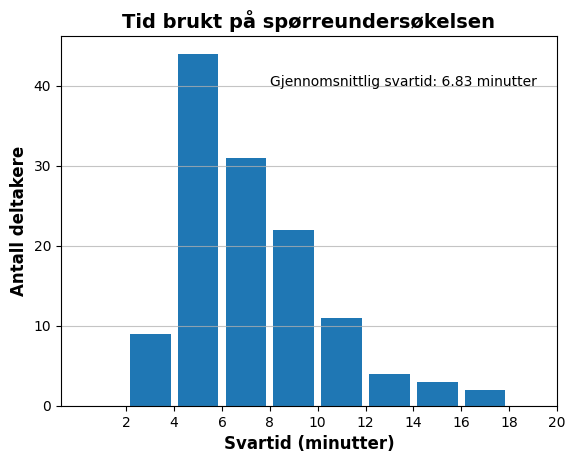

In [11]:
# SVARTID

# Create a new column for the total time in minutes
svartid_df['Svartid_min'] = svartid_df['Svartid'].apply(lambda x: extract_minutes(x))
mean_svartid = round(svartid_df['Svartid_min'].mean(),2)
# create a histogram of the time taken by participants
plt.hist(svartid_df['Svartid_min'], bins=range(0,max(svartid_df['Svartid_min']),2) , rwidth = 0.85)

plt.xticks(np.arange(int(svartid_df['Svartid_min'].min()), int(svartid_df['Svartid_min'].max()) + 1, 2))

# add axis labels and a title
plt.xlabel('Svartid (minutter)' , fontsize = 12, fontweight = 'bold')
plt.ylabel('Antall deltakere' , fontsize = 12, fontweight = 'bold')
plt.grid(axis='y', alpha = 0.75)
plt.title('Tid brukt på spørreundersøkelsen', fontsize = 14, fontweight = 'bold')

plt.savefig('Svartid_alle.png')
#plt.axvline(mean_svartid, color='#1f77b4', linestyle='--', label='Gjennomsnittlig svartid')
plt.text(8,40,f'Gjennomsnittlig svartid: {mean_svartid:.2f} minutter')
# display the histogram
plt.savefig('Svartid_alle.png',bbox_inches='tight')
plt.show()

#f'Gjennomsnittlig poengsum: {mean:.2f}%'

In [ ]:
print(svartid_df['Svartid_min'].mean())

6.826771653543307


### Beregne resultater fra symbolene som inkluderer sykkel ###

#### Beregne riktige og feil svar i prosentandel ####

In [12]:
#sykkelbildene


# Telle svar avgitt til bilde nr 1 der riktig svar var Cyclocross
word_counts_bilde1 = BILDE_NR_1_df['BILDE NR. 1'].str.split().explode().value_counts()
# Telle svar avgitt til bilde nr 1 der riktig svar var Terreng-sykling
word_counts_bilde2 = BILDE_NR_2_df['BILDE NR.2'].str.split().explode().value_counts()
# Telle svar avgitt til bilde nr 1 der riktig svar var Tursykling
word_counts_bilde3 = BILDE_NR_3_df['BILDE NR.3'].str.split().explode().value_counts()
# Telle svar avgitt til bilde nr 1 der riktig svar var Utforsykling
word_counts_bilde4 = BILDE_NR_4_df['BILDE NR.4'].str.split().explode().value_counts()

# Lage dictionaries for de 4 bildene. 
svar_dict_bilde1 = dict(zip(word_counts_bilde1.index.tolist(), word_counts_bilde1.tolist()))
svar_dict_bilde2 = dict(zip(word_counts_bilde2.index.tolist(), word_counts_bilde2.tolist()))
svar_dict_bilde3 = dict(zip(word_counts_bilde3.index.tolist(), word_counts_bilde3.tolist()))
svar_dict_bilde4 = dict(zip(word_counts_bilde4.index.tolist(), word_counts_bilde4.tolist()))


# Calculate the total number of responses
total_responses_bilde1 = sum(svar_dict_bilde1.values())
total_responses_bilde2 = sum(svar_dict_bilde2.values())
total_responses_bilde3 = sum(svar_dict_bilde3.values())
total_responses_bilde4 = sum(svar_dict_bilde4.values())

correct_count_bilde1 = svar_dict_bilde1['Cyclocross']
correct_count_bilde2 = svar_dict_bilde2['Terreng-sykling']
correct_count_bilde3 = svar_dict_bilde3['Tursykling']
correct_count_bilde4 = svar_dict_bilde4['Utforsykling']


# Calculate the percentage of correct answers
correct_percent_bilde1 = (correct_count_bilde1 / total_responses_bilde1) * 100
correct_percent_bilde2 = (correct_count_bilde2 / total_responses_bilde2) * 100
correct_percent_bilde3 = (correct_count_bilde3 / total_responses_bilde3) * 100
correct_percent_bilde4 = (correct_count_bilde4 / total_responses_bilde4) * 100

# Calculate the percentage of wrong answers
#wrong_percent = 100 - correct_percent

# Print the results
print('Percentage of correct answers Cyclocross:', correct_percent_bilde1)
print('Percentage of correct answers Terrengsykling:', correct_percent_bilde2)
print('Percentage of correct answers Tursykling:', correct_percent_bilde3)
print('Percentage of correct answers Utforsykling:', correct_percent_bilde4)
#print('Percentage of wrong answers:', wrong_percent)¨

riktig_cyclocross = round(correct_percent_bilde1,2)
riktig_terrengsykling = round(correct_percent_bilde2,2)
riktig_tursykling = round(correct_percent_bilde3,2)
riktig_utforsykling = round(correct_percent_bilde4,2)

Percentage of correct answers Cyclocross: 66.92913385826772
Percentage of correct answers Terrengsykling: 69.29133858267717
Percentage of correct answers Tursykling: 94.48818897637796
Percentage of correct answers Utforsykling: 86.61417322834646


In [13]:


riktigdf14 = BILDE_NR_1_df.replace("Cyclocross", 1).replace(to_replace=r'^((?!1).)*$', value=0, regex=True)
riktigdf15 = BILDE_NR_2_df.replace("Terreng-sykling",1).replace(to_replace=r'^((?!1).)*$', value=0, regex=True)
riktigdf16 = BILDE_NR_3_df.replace("Tursykling",1).replace(to_replace=r'^((?!1).)*$', value=0, regex=True)
riktigdf17 = BILDE_NR_4_df.replace("Utforsykling",1).replace(to_replace=r'^((?!1).)*$', value=0, regex=True)

In [14]:
riktigdf16.mean()

BILDE NR.3    0.944882
dtype: float64

#### Kalkulere antall svar i prosent for alle bildene ####

In [15]:

#Calculate all percents 
#Bilde 1
cyclo_count_bilde1 = svar_dict_bilde1['Cyclocross']
terreng_count_bilde1 = svar_dict_bilde1['Terreng-sykling']
tur_count_bilde1 = svar_dict_bilde1['Tursykling']
utfor_count_bilde1 = svar_dict_bilde1['Utforsykling']

cyclo_percent_bilde1 = (cyclo_count_bilde1 / total_responses_bilde1) * 100
terreng_percent_bilde1 = (terreng_count_bilde1 / total_responses_bilde1) * 100
tur_percent_bilde1 = (tur_count_bilde1 / total_responses_bilde1) * 100
utfor_percent_bilde1 = (utfor_count_bilde1 / total_responses_bilde1) * 100

prosent_dict_bilde1 = {'Cyclocross': cyclo_percent_bilde1, 'Terreng-sykling': terreng_percent_bilde1, 'Tursykling': tur_percent_bilde1, 'Utforsykling': utfor_percent_bilde1}


#Bilde 2
cyclo_count_bilde2 = svar_dict_bilde2['Cyclocross']
terreng_count_bilde2= svar_dict_bilde2['Terreng-sykling']
tur_count_bilde2 = svar_dict_bilde2['Tursykling']
utfor_count_bilde2 = svar_dict_bilde2['Utforsykling']

cyclo_percent_bilde2 = (cyclo_count_bilde2 / total_responses_bilde2) * 100
terreng_percent_bilde2 = (terreng_count_bilde2 / total_responses_bilde2) * 100
tur_percent_bilde2 = (tur_count_bilde2 / total_responses_bilde2) * 100
utfor_percent_bilde2 = (utfor_count_bilde2 / total_responses_bilde2) * 100

prosent_dict_bilde2 = {'Cyclocross': cyclo_percent_bilde2 ,'Terreng-sykling': terreng_percent_bilde2 ,'Tursykling': tur_percent_bilde2 ,'Utforsykling': utfor_percent_bilde2}

#Bilde 3
cyclo_count_bilde3 = svar_dict_bilde3['Cyclocross']
terreng_count_bilde3 = svar_dict_bilde3['Terreng-sykling']
tur_count_bilde3 = svar_dict_bilde3['Tursykling']
utfor_count_bilde3 = svar_dict_bilde3['Utforsykling']

cyclo_percent_bilde3 = (cyclo_count_bilde3 / total_responses_bilde3) * 100
terreng_percent_bilde3 = (terreng_count_bilde3 / total_responses_bilde3) * 100
tur_percent_bilde3 = (tur_count_bilde3 / total_responses_bilde3) * 100
utfor_percent_bilde3 = (utfor_count_bilde3 / total_responses_bilde3) * 100

prosent_dict_bilde3 = {'Cyclocross': cyclo_percent_bilde3 ,'Terreng-sykling': terreng_percent_bilde3 ,'Tursykling': tur_percent_bilde3 ,'Utforsykling': utfor_percent_bilde3}

#Bilde 4
cyclo_count_bilde4 = svar_dict_bilde4['Cyclocross']
terreng_count_bilde4 = svar_dict_bilde4['Terreng-sykling']
tur_count_bilde4 = svar_dict_bilde4['Tursykling']
utfor_count_bilde4 = svar_dict_bilde4['Utforsykling']

cyclo_percent_bilde4 = (cyclo_count_bilde4 / total_responses_bilde4) * 100
terreng_percent_bilde4 = (terreng_count_bilde4 / total_responses_bilde4) * 100
tur_percent_bilde4 = (tur_count_bilde4 / total_responses_bilde4) * 100
utfor_percent_bilde4 = (utfor_count_bilde4 / total_responses_bilde4) * 100

prosent_dict_bilde4 = {'Cyclocross': cyclo_percent_bilde4 ,'Terreng-sykling': terreng_percent_bilde4 ,'Tursykling': tur_percent_bilde4 ,'Utforsykling': utfor_percent_bilde4}


print(prosent_dict_bilde1)
print(prosent_dict_bilde2)
print(prosent_dict_bilde3)
print(prosent_dict_bilde4)



{'Cyclocross': 66.92913385826772, 'Terreng-sykling': 23.62204724409449, 'Tursykling': 1.574803149606299, 'Utforsykling': 7.874015748031496}
{'Cyclocross': 28.346456692913385, 'Terreng-sykling': 69.29133858267717, 'Tursykling': 0.7874015748031495, 'Utforsykling': 1.574803149606299}
{'Cyclocross': 0.7874015748031495, 'Terreng-sykling': 2.3622047244094486, 'Tursykling': 94.48818897637796, 'Utforsykling': 2.3622047244094486}
{'Cyclocross': 3.149606299212598, 'Terreng-sykling': 7.086614173228346, 'Tursykling': 3.149606299212598, 'Utforsykling': 86.61417322834646}


In [16]:
combined_sykkel = {}
combined_sykkel_df = pd.DataFrame.from_dict({
    'Cyclocross': [round(prosent_dict_bilde1['Cyclocross'], 2), round(prosent_dict_bilde2['Cyclocross'], 2), round(prosent_dict_bilde3['Cyclocross'], 2), round(prosent_dict_bilde4['Cyclocross'], 2)],
    'Terreng-Sykling': [round(prosent_dict_bilde1['Terreng-sykling'], 2), round(prosent_dict_bilde2['Terreng-sykling'], 2), round(prosent_dict_bilde3['Terreng-sykling'], 2), round(prosent_dict_bilde4['Terreng-sykling'], 2)],
    'Tursykling': [round(prosent_dict_bilde1['Tursykling'], 2), round(prosent_dict_bilde2['Tursykling'], 2), round(prosent_dict_bilde3['Tursykling'], 2), round(prosent_dict_bilde4['Tursykling'], 2)],
    'Utforsykling': [round(prosent_dict_bilde1['Utforsykling'], 2), round(prosent_dict_bilde2['Utforsykling'], 2), round(prosent_dict_bilde3['Utforsykling'], 2), round(prosent_dict_bilde4['Utforsykling'], 2)]
}, orient='index', columns=['Cyclocross', 'Terreng-Sykling', 'Tursykling', 'Utforsykling'])

# Print the dataframe
print(combined_sykkel_df)



                 Cyclocross  Terreng-Sykling  Tursykling  Utforsykling
Cyclocross            66.93            28.35        0.79          3.15
Terreng-Sykling       23.62            69.29        2.36          7.09
Tursykling             1.57             0.79       94.49          3.15
Utforsykling           7.87             1.57        2.36         86.61


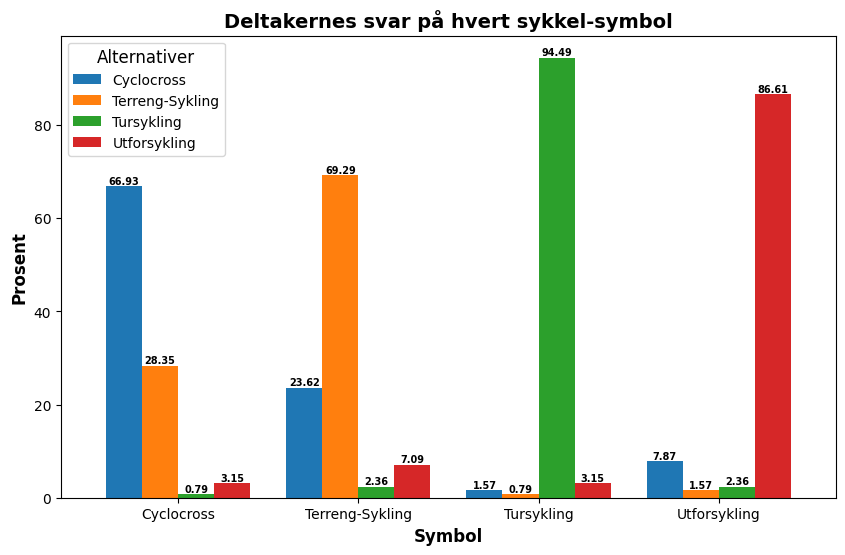

In [17]:
# Create a bar plot of the dataframe
ax = combined_sykkel_df.plot(kind='bar', figsize=(10, 6),rot=0,width=0.8)

# Add percentage values on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=7,fontweight='bold')

# Set the title and axis labels
plt.title('Deltakernes svar på hvert sykkel-symbol',fontweight='bold',fontsize=14)
plt.xlabel('Symbol',fontweight = 'bold', fontsize=12)
plt.ylabel('Prosent',fontweight = 'bold', fontsize=12)

# add a title to the legend
ax.legend(title='Alternativer', title_fontsize=12)

# Display the plot
plt.savefig('Sykkel_alle.png',bbox_inches='tight')
plt.show()

#### Gjøre statisk test på bildene ved å bruke et contigency table ####

In [18]:
#Lage contigency table

dict_list = [svar_dict_bilde1,svar_dict_bilde2,svar_dict_bilde3,svar_dict_bilde4]

# create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(dict_list)

# transpose the dataframe to get your desired matrix
matrix = df.T

# calculate the row and column totals
matrix['Total'] = matrix.sum(axis=1)
matrix.loc['Total'] = matrix.sum()

# display the resulting matrix
#print(matrix)


# create the contingency table (excluding the row and column totals)
contingency_table = matrix.iloc[:-1, :-1]

# perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-squared value: 876.8068049955294
P-value: 6.140574608520444e-183
Degrees of freedom: 9
Expected values:
[[31.5  31.5  31.5  31.5 ]
 [32.5  32.5  32.5  32.5 ]
 [31.25 31.25 31.25 31.25]
 [31.75 31.75 31.75 31.75]]


### Visualisere svar på bransjespørsmål ###

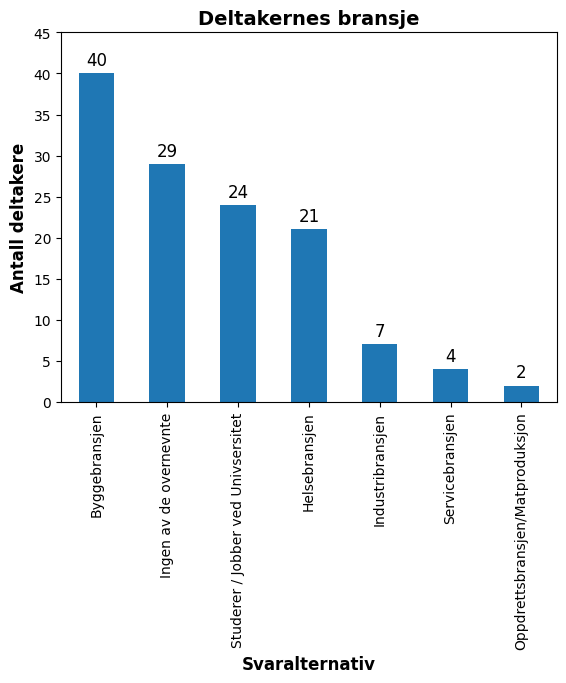

In [19]:
#### Grunnet feil i kodeboken i nettskjema må de underliggende linjene kjørest hver gang du laster inn. Kommenter ut igjen når dette er gjort en gang
bransje_df['bransje'] = bransje_df['bransje'].replace('Ingen av de overnevte', 7)
bransje_df['bransje'] = bransje_df['bransje'].astype(int)
#####


bransje_df_plot = bransje_df.replace({1: 'Studerer / Jobber ved Univsersitet', 2: 'Byggebransjen', 3: 'Oppdrettsbransjen/Matproduksjon', 4: 'Helsebransjen', 5: 'Servicebransjen', 6: 'Industribransjen', 7: 'Ingen av de overnevnte'})
counts_bransje = bransje_df_plot['bransje'].value_counts()

# Define a color map
colors = plt.cm.tab20.colors[:len(counts_bransje)]

# Create a bar chart of the response counts
ax = counts_bransje.plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(counts_bransje):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Deltakernes bransje', fontsize=14, fontweight='bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight='bold')
plt.ylabel('Antall deltakere', fontsize=12, fontweight='bold')

# Add a legend
#plt.legend(loc='upper right')

# Add grid lines
#plt.grid(axis='y')

plt.ylim([0, counts_bransje.max() + 5])

# Display the chart
plt.savefig('Bransje_alle.png',bbox_inches='tight')
plt.show()


### Visualisere svar på alder spørsmålet ###

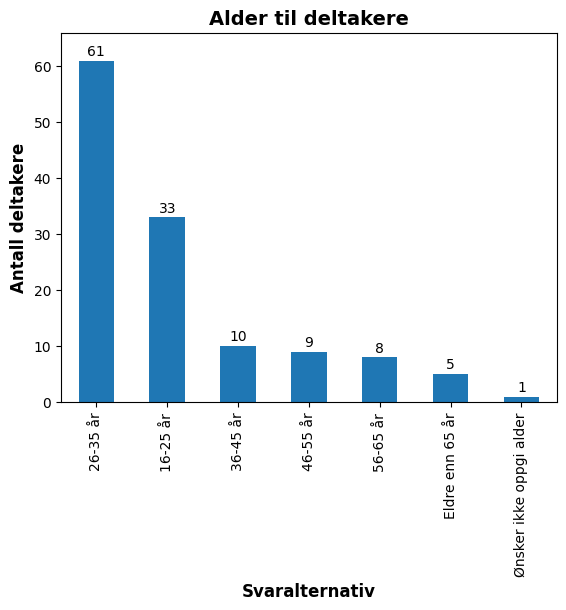

In [20]:
#ALDER SVAR

response_map = {1: 'Yngre enn 16 år', 2: '16-25 år', 3: '26-35 år', 4: '36-45 år', 5: '46-55 år', 6: '56-65 år', 7: 'Eldre enn 65 år', 8: 'Ønsker ikke oppgi alder'}
counts_alder = alder_df['alder'].map(response_map).value_counts()

# Create a bar chart of the response counts
counts_alder.plot(kind='bar')



# Create a bar chart of the response counts
ax = counts_alder.plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(counts_alder):
    ax.text(i, v + 1, str(v), ha='center')

# Add a title
plt.title('Alder til deltakere', fontsize=14,fontweight='bold')

# Add axis labels
plt.ylim(0,max(counts_alder)+5)
plt.xlabel('Svaralternativ', fontsize=12,fontweight='bold')
plt.ylabel('Antall deltakere', fontsize=12,fontweight='bold')
#plt.grid(axis='y')



# Display the chart
plt.savefig('Alder_alle.png',bbox_inches='tight')
plt.show()

### Visualisere svar på om de er studerer ved ntnu eller ikke ###

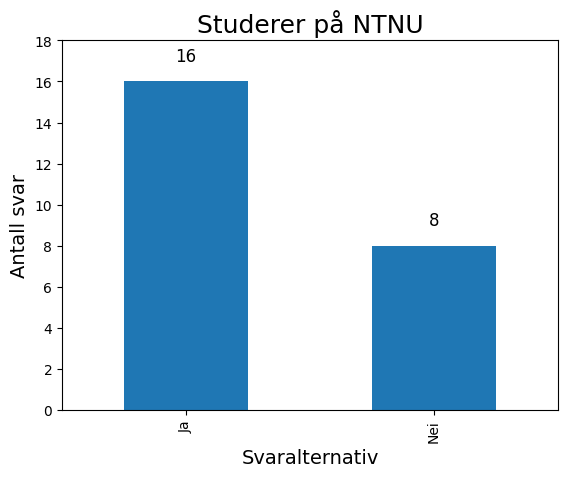

In [67]:
#StudererNTNU SVAR

response_map = {0: 'Nei', 1: 'Ja'}
counts_studererntnu = studererntnu_df['studererntnu'].map(response_map).value_counts()

# Create a bar chart of the response counts
counts_studererntnu.plot(kind='bar')



# Create a bar chart of the response counts
ax = counts_studererntnu.plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(counts_studererntnu):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Studerer på NTNU', fontsize=18)

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=14)
plt.ylabel('Antall svar', fontsize=14)
plt.ylim(0,max(counts_studererntnu)+2)



# Display the chart
# Display the chart
plt.savefig('Studerer_ntnu.png',bbox_inches='tight')
plt.show()


## Visualisere svar på kartbruk ##

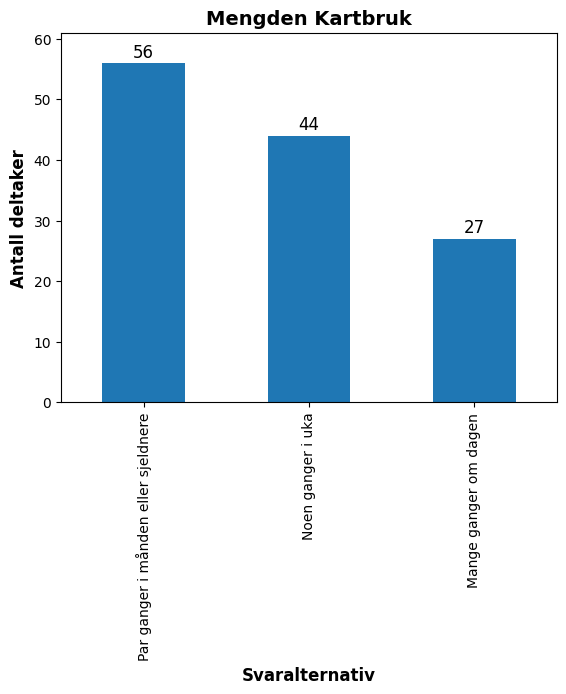

In [66]:
#Kartbruk SVAR

response_map = {1: 'Mange ganger om dagen', 2: 'Noen ganger i uka', 3: 'Par ganger i månden eller sjeldnere'}
counts_kartbruk = kartbruk_df['kartbruk'].map(response_map).value_counts()

# Create a bar chart of the response counts
counts_kartbruk.plot(kind='bar')



# Create a bar chart of the response counts
ax = counts_kartbruk.plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(counts_kartbruk):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Mengden Kartbruk', fontsize=14, fontweight = 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall deltaker', fontsize=12, fontweight = 'bold')
plt.ylim(0,max(counts_kartbruk)+5)


# Display the chart
plt.savefig('Kartbruk_alle.png',bbox_inches='tight')
plt.show()

### Visualisere svar på om de studerer noe ved geografisk informasjonsbehandling eller ikke ###

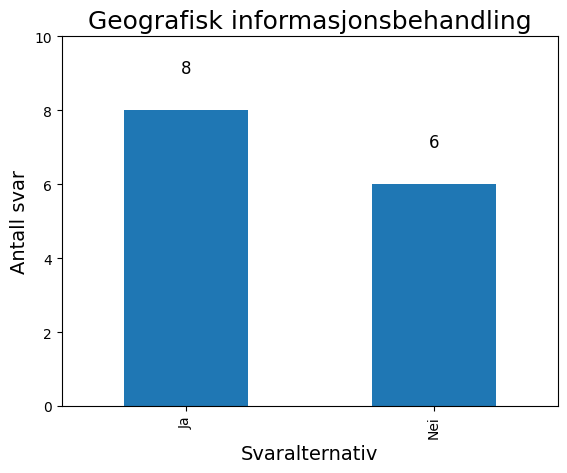

In [65]:
#GEOGRAFISK INFORMASJONSBEHANDLING

response_map = {1: 'Ja', 0: 'Nei' }
counts_geografiskinformasjonsbehandling = geografiskinformasjonsbehandling_df['geografiskinformasjonsbehandling'].map(response_map).value_counts()

# Create a bar chart of the response counts
counts_geografiskinformasjonsbehandling.plot(kind='bar')



# Create a bar chart of the response counts
ax = counts_geografiskinformasjonsbehandling.plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(counts_geografiskinformasjonsbehandling):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Geografisk informasjonsbehandling', fontsize=18)

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=14)
plt.ylabel('Antall svar', fontsize=14)
plt.ylim(0,10)



# Display the chart
plt.savefig('Geografiskinformasjonsbehandling.png',bbox_inches='tight')
plt.show()

### Visualisere svar på hvilket fakultet de går ved om de er student ###

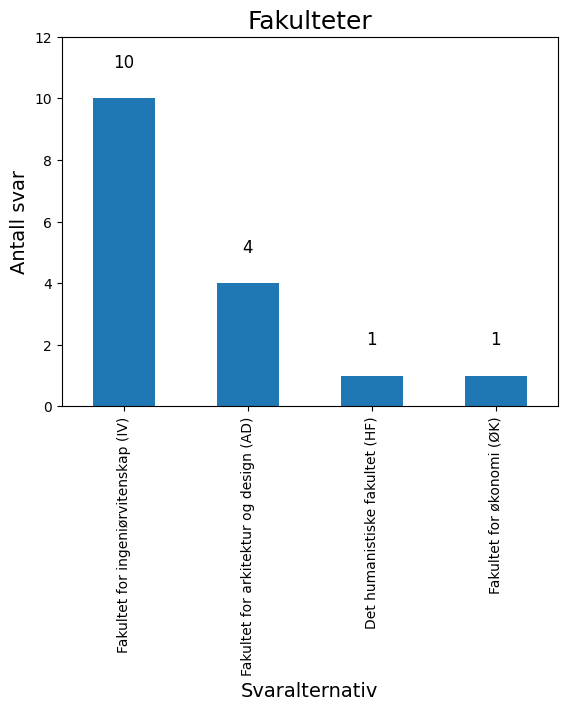

In [64]:
#FAKULTETER SVAR

response_map = {1: 'Fakultet for arkitektur og design (AD)', 2: 'Det humanistiske fakultet (HF)', 3: 'Fakultet for informasjonsteknologi og elektroteknikk (IE)', 4: 'Fakultet for ingeniørvitenskap (IV)', 5: 'Fakultet for medisin og helsevitenskap (MH)', 6: 'Fakultet for naturvitenskap (NV)', 7: 'Fakultet for samfunns- og utdanningsvitenskap (SU)', 8: 'Fakultet for økonomi (ØK)', 9: 'NTNU Vitenskapsmuseet (VM)' }
counts_fakultet = fakultet_df['fakultet'].map(response_map).value_counts()

# Create a bar chart of the response counts
counts_fakultet.plot(kind='bar')



# Create a bar chart of the response counts
ax = counts_fakultet.plot(kind='bar')

# Add text labels on top of each bar
for i, v in enumerate(counts_fakultet):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Fakulteter', fontsize=18)

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=14)
plt.ylabel('Antall svar', fontsize=14)



# Display the chart
plt.ylim(0,max(counts_fakultet)+2)



# Display the chart
# Display the chart
plt.savefig('Fakulteter.png',bbox_inches='tight')
plt.show()

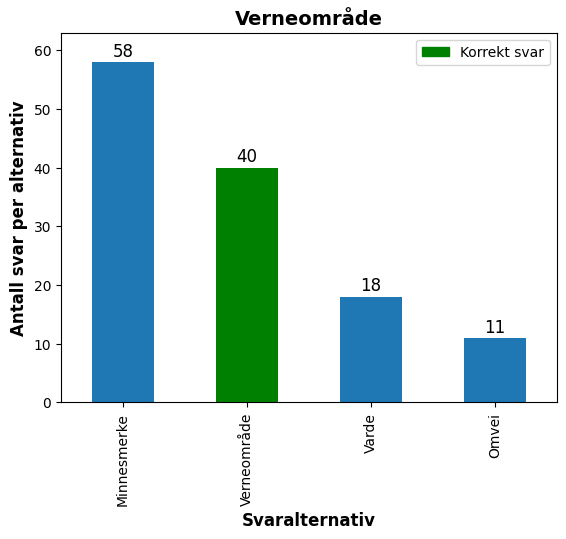

Riktige svar: 31.5 %


In [25]:
#Verneområde

correct_answer = 'Verneområde'

response_map = {0: 'Verneområde', 2: 'Minnesmerke', 3: 'Varde', 4: 'Omvei'}
counts_verneomrade = verneomrade_df['verneomrade'].map(response_map).value_counts()

# Create a bar chart of the response counts
ax = counts_verneomrade.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer_idx = counts_verneomrade.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_verneomrade):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a legend for the correct answer

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Verneområde', fontsize=14, fontweight='bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight='bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight='bold')
#plt.grid(axis='y')
plt.ylim(0,max(counts_verneomrade)+5)

# Display the chart
plt.savefig('Verneomraade_alle.png',bbox_inches='tight')
plt.show()

riktig_verneomrade,riktigdf0 = correct_answers(verneomrade_df,'verneomrade')

### Visualisere svar på drikkevannskilde spørsmålet ###

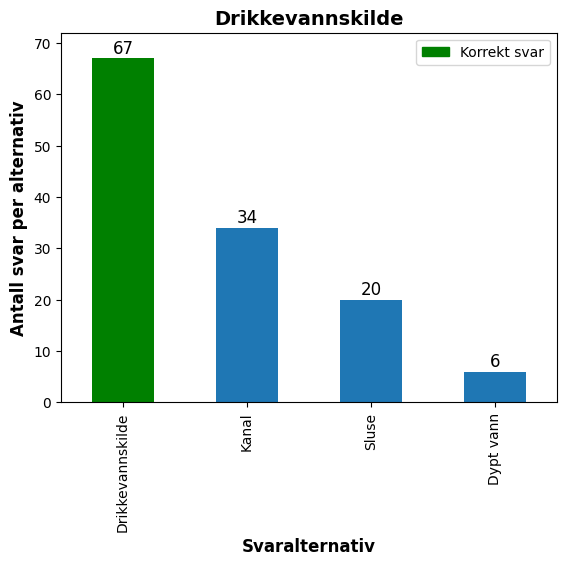

Riktige svar: 52.76 %


In [26]:
#Drikkevannskilde

response_map = {1: 'Kanal', 2: 'Dypt vann', 0: 'Drikkevannskilde', 4: 'Sluse'}
counts_drikkevannskilde = drikkevannskilde_df['drikkevannskilde'].map(response_map).value_counts()

# Create a bar chart of the response counts
ax = counts_drikkevannskilde.plot(kind='bar')


# Set the color of the correct answer bar to green
correct_answer = 'Drikkevannskilde'
correct_answer_idx = counts_drikkevannskilde.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_drikkevannskilde):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a legend for the correct answer

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Drikkevannskilde', fontsize=14, fontweight='bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight='bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight='bold')
#plt.grid(axis='y')
plt.ylim(0,max(counts_drikkevannskilde)+5)


# Display the chart
plt.savefig('Drikkevannskilde_alle',bbox_inches = 'tight')
plt.show()

riktig_drikkevannskilde,riktigdf1 = correct_answers(drikkevannskilde_df,'drikkevannskilde')


### Visualisere svar på T-bane spørsmålet ###

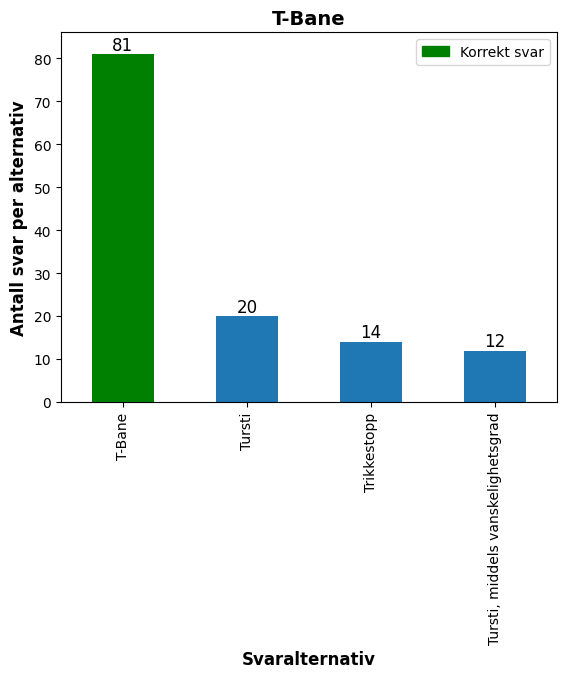

Riktige svar: 63.78 %


In [27]:
#TBANE

response_map = {0: 'T-Bane', 2: 'Tursti', 3: 'Trikkestopp', 4: 'Tursti, middels vanskelighetsgrad'}
counts_tbane = tbane_df['tbane'].map(response_map).value_counts()


# Create a bar chart of the response counts
ax = counts_tbane.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'T-Bane'
correct_answer_idx = counts_tbane.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_tbane):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('T-Bane', fontsize=14, fontweight= 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight= 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight= 'bold')
plt.ylim(0,max(counts_tbane)+5)


# Display the chart
plt.savefig('T_bane_alle.png',bbox_inches = 'tight')
plt.show()

riktig_tbane,riktigdf2 = correct_answers(tbane_df,'tbane')

### Visualisere svar på åpent husvær spørsmålet ###

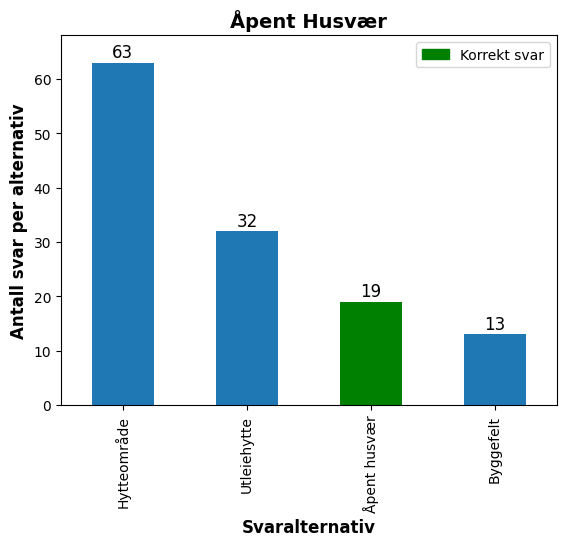

Riktige svar: 14.96 %


In [28]:
# aapenthusvaer

response_map = {1: 'Hytteområde', 2: 'Utleiehytte', 3: 'Byggefelt', 0: 'Åpent husvær'}
counts_aapenthusvaer = aapenthusvaer_df['aapenthusvaer'].map(response_map).value_counts()


# Create a bar chart of the response counts
ax = counts_aapenthusvaer.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Åpent husvær'
correct_answer_idx = counts_aapenthusvaer.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_aapenthusvaer):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Åpent Husvær', fontsize=14, fontweight= 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight= 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight= 'bold')
plt.ylim(0,max(counts_aapenthusvaer)+5)


# Display the chart
plt.savefig('Aapent_husvaer_alle.png',bbox_inches='tight')
plt.show()

riktig_aapenthusvaer,riktigdf3 = correct_answers(aapenthusvaer_df,'aapenthusvaer')


### Visualisere svar på hundeløype spørsmålet ###

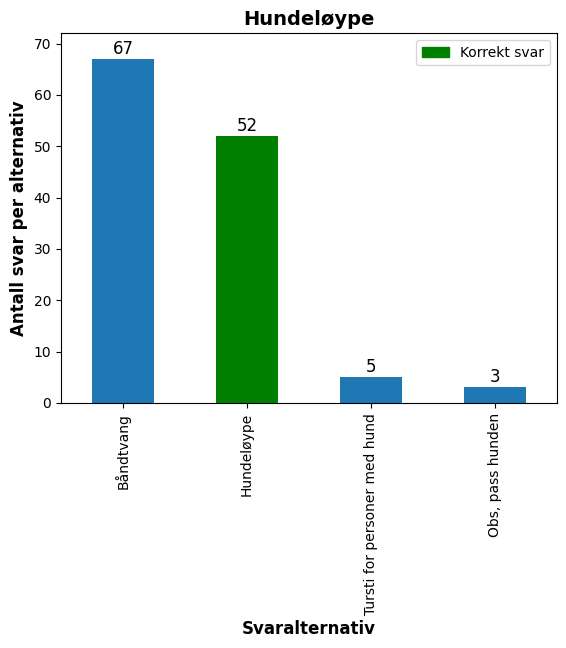

Riktige svar: 40.94 %


In [29]:
# hunndeloeype

response_map = {1: 'Tursti for personer med hund', 0: 'Hundeløype', 3: 'Båndtvang', 4: 'Obs, pass hunden'}
counts_hunndeloeype = hunndeloeype_df['hunndeloeype'].map(response_map).value_counts()


# Create a bar chart of the response counts
ax = counts_hunndeloeype.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Hundeløype'
correct_answer_idx = counts_hunndeloeype.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_hunndeloeype):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Hundeløype', fontsize=14,fontweight= 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12,fontweight= 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12,fontweight= 'bold')
plt.ylim(0,max(counts_hunndeloeype)+5)



# Display the chart
plt.savefig('Hundeløype_alle.png',bbox_inches='tight')
plt.show()

riktig_hunndeloeype,riktigdf4 = correct_answers(hunndeloeype_df,'hunndeloeype')

### Visualisere svar på gapahuk spørsmålet ###

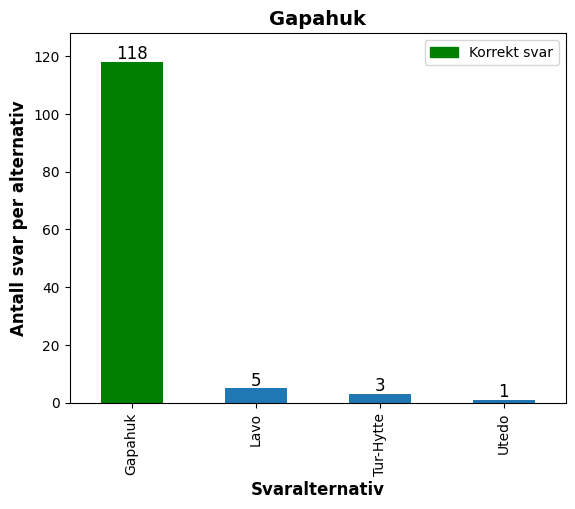

Riktige svar: 92.91 %


In [30]:
#GAPAHUK SVAR


response_map = {0: 'Gapahuk', 1: 'Tur-Hytte', 2: 'Lavo', 4: 'Utedo'}
counts_gapahuk = gapahuk_df['gapahuk'].map(response_map).value_counts()


# Create a bar chart of the response counts
ax = counts_gapahuk.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Gapahuk'
correct_answer_idx = counts_gapahuk.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add text labels on top of each bar
for i, v in enumerate(counts_gapahuk):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Gapahuk', fontsize=14, fontweight='bold')

# Add axis labels, fontweight='bold'
plt.xlabel('Svaralternativ', fontsize=12, fontweight='bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight='bold')
plt.ylim(0,max(counts_gapahuk)+10)


# Display the chart
plt.savefig('Gapahuk_alle.png',bbox_inches = 'tight')
plt.show()

riktig_gapahuk,riktigdf5 = correct_answers(gapahuk_df,'gapahuk')


### Visualisere svar på helsestasjon spørsmålet ###

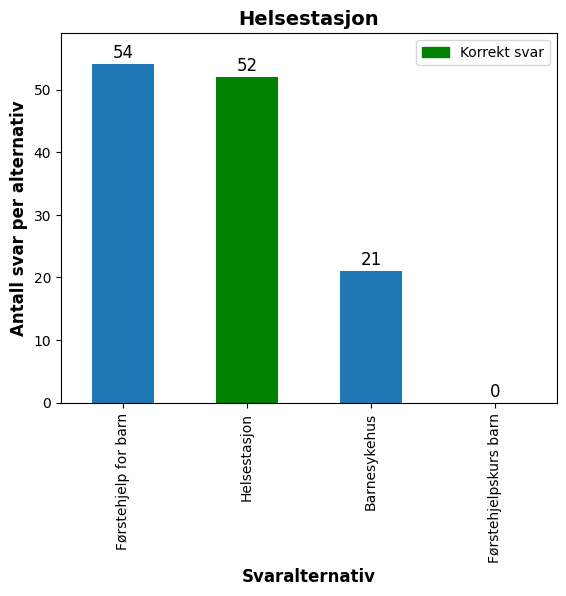

Riktige svar: 40.94 %


In [31]:
# Helsestasjon

response_map = {1: 'Barnesykehus', 0: 'Helsestasjon', 3: 'Førstehjelpskurs barn', 4: 'Førstehjelp for barn'}
counts_helsestasjon = helsestasjon_df['helsestasjon'].map(response_map).value_counts()


# Check if all response options are in counts_helsestasjon
for option in response_map.values():
    if option not in counts_helsestasjon.index:
        counts_helsestasjon[option] = 0


# Create a bar chart of the response counts
ax = counts_helsestasjon.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Helsestasjon'
correct_answer_idx = counts_helsestasjon.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Set y-axis limits to include zero counts
plt.ylim(0, max(counts_helsestasjon) + 5)

# Add text labels on top of each bar
for i, v in enumerate(counts_helsestasjon):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

# Add a title
plt.title('Helsestasjon', fontsize=14, fontweight= 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight= 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight= 'bold')



# Display the chart
plt.savefig('Helsestasjon_alle.png',bbox_inches = 'tight')
plt.show()

riktig_helsestasjon,riktigdf6 = correct_answers(helsestasjon_df,'helsestasjon')

### Visualisere svar på kulturhus spørsmålet ###

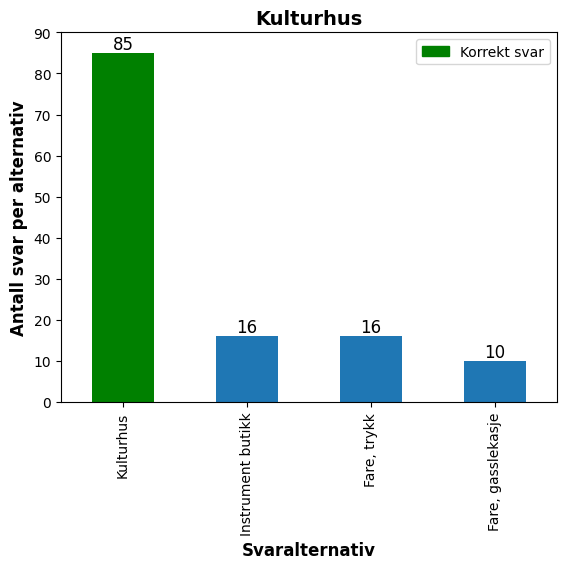

Riktige svar: 66.93 %


In [32]:
#kulturhus SVAR


response_map = {0: 'Kulturhus', 1: 'Instrument butikk', 3: 'Fare, trykk', 4: 'Fare, gasslekasje'}
counts_kulturhus = kulturhus_df['kulturhus'].map(response_map).value_counts()


# Create a bar chart of the response counts
ax = counts_kulturhus.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Kulturhus'
correct_answer_idx = counts_kulturhus.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_kulturhus):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Kulturhus', fontsize=14, fontweight = 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')
plt.ylim(0,max(counts_kulturhus)+5)


# Display the chart
plt.savefig('Kulturhus_alle.png',bbox_inches ='tight')
plt.show()

riktig_kulturhus,riktigdf7 = correct_answers(kulturhus_df,'kulturhus')


### Visualisere svar på politi spørsmålet ###

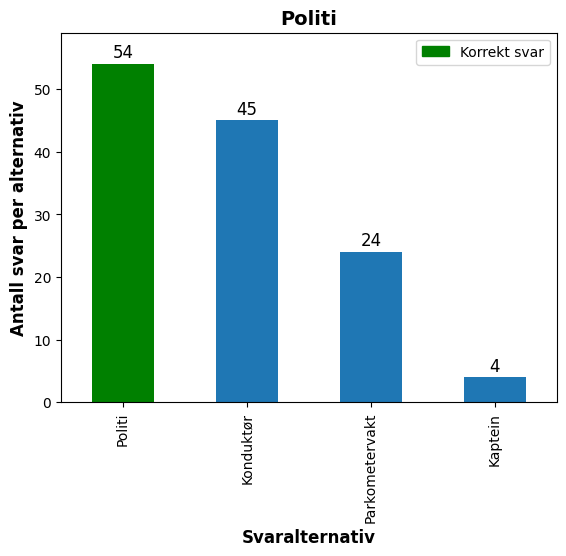

Riktige svar: 42.52 %


In [33]:
#POLITI SVAR


response_map = {1: 'Parkometervakt', 0: 'Politi', 3: 'Konduktør', 4: 'Kaptein'}
counts_politi = politi_df['politi'].map(response_map).value_counts()


# Create a bar chart of the response counts
ax = counts_politi.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Politi'
correct_answer_idx = counts_politi.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_politi):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])
# Add a title
plt.title('Politi', fontsize=14, fontweight = 'bold')

# Set y-axis limits to include zero counts
plt.ylim(0, max(counts_politi) + 5)

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')




# Display the chart
plt.savefig('Politi_alle.png',bbox_inches='tight')
plt.show()


riktig_politi,riktigdf8 = correct_answers(politi_df,'politi')

### Visualisere svar på rundtur spørsmålet

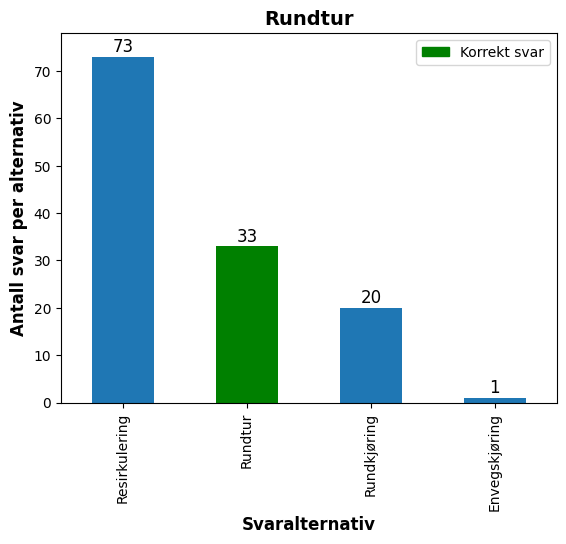

Riktige svar: 25.98 %


In [34]:
#RUNDTUR SVAR


response_map = {1: 'Resirkulering', 2: 'Rundkjøring', 0: 'Rundtur', 4: 'Envegskjøring'}
counts_rundtur = rundtur_df['rundtur'].map(response_map).value_counts()

# Create a bar chart of the response counts
ax = counts_rundtur.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Rundtur'
correct_answer_idx = counts_rundtur.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_rundtur):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Rundtur', fontsize=14, fontweight = 'bold')
plt.ylim(0, max(counts_rundtur) + 5)
# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')



# Display the chart
plt.savefig('Rundtur_alle.png',bbox_inches ='tight')
plt.show()

riktig_rundtur,riktigdf9 = correct_answers(rundtur_df,'rundtur')

### Visualisere svar på utsiktpunkt spørsmålet ###

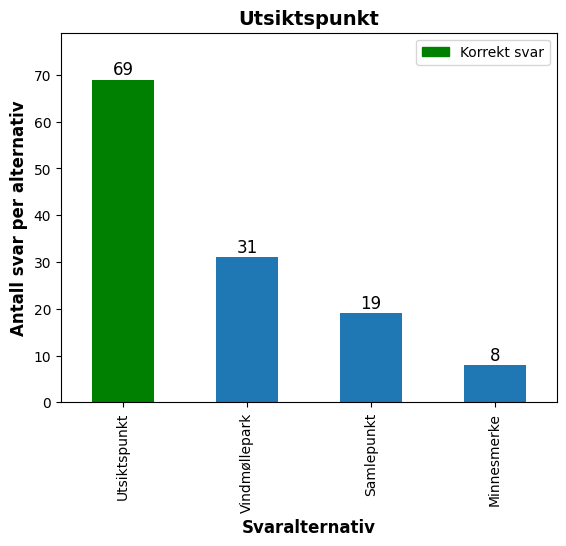

Riktige svar: 54.33 %


In [35]:
#UTSIKTSPUNKT SVAR


response_map = {1: 'Minnesmerke', 2: 'Vindmøllepark', 0: 'Utsiktspunkt', 4: 'Samlepunkt'}
counts_utsiktspunkt = utsiktspunkt_df['utsiktspunkt'].map(response_map).value_counts()

# Create a bar chart of the response counts
ax = counts_utsiktspunkt.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Utsiktspunkt'
correct_answer_idx = counts_utsiktspunkt.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_utsiktspunkt):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)


green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Utsiktspunkt', fontsize=14, fontweight = 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')
plt.ylim(0,max(counts_utsiktspunkt)+10)



# Display the chart
plt.savefig('Utsiktspunkt_alle.png',bbox_inches = 'tight')
plt.show()

riktig_utsiktspunkt,riktigdf10= correct_answers(utsiktspunkt_df,'utsiktspunkt')

### Visualisere svar på gruve spørsmålet ###

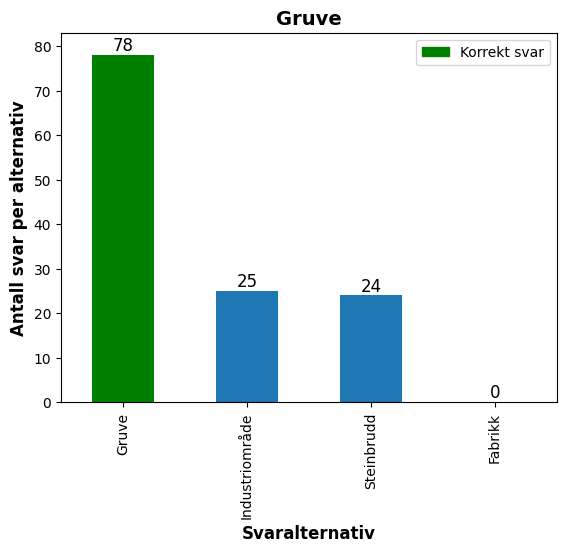

Riktige svar: 61.42 %


In [36]:
#GRUVE SVAR


response_map = {0: 'Gruve', 2: 'Fabrikk', 3: 'Industriområde', 4: 'Steinbrudd'}
counts_gruve = gruve_df['gruve'].map(response_map).value_counts()

for option in response_map.values():
    if option not in counts_gruve.index:
        counts_gruve[option] = 0


# Create a bar chart of the response counts
ax = counts_gruve.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Gruve'
correct_answer_idx = counts_gruve.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_gruve):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Gruve', fontsize=14, fontweight = 'bold')
plt.ylim(0, max(counts_gruve)+5)


# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')



# Display the chart
plt.savefig('Gruve_alle.png',bbox_inches = 'tight')
plt.show()

riktig_gruve,riktigdf11 = correct_answers(gruve_df,'gruve')

### Visualisere svar på baattrafikk spørsmålet ###

baattrafikk
Fare båttrafikk          44
Fare militærskipssone    40
Fare, gå mot styrbord    33
Fare, gå mot babord      10
Name: count, dtype: int64


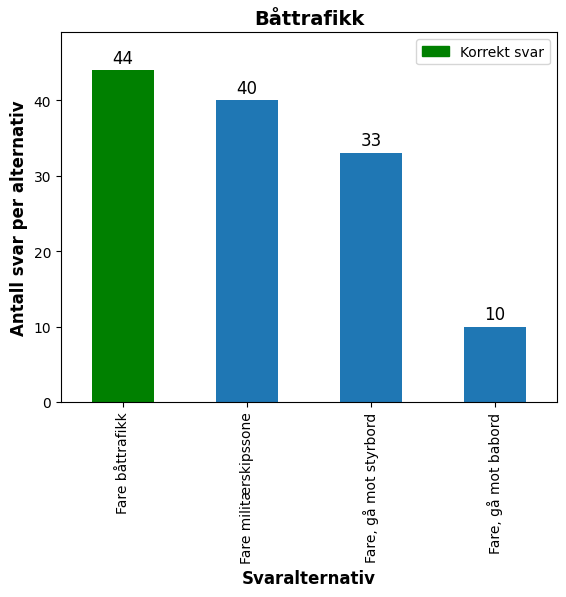

Riktige svar: 34.65 %


In [37]:
#BAATTRAFIKK SVAR


response_map = {1: 'Fare militærskipssone', 0: 'Fare båttrafikk', 3: 'Fare, gå mot styrbord', 4: 'Fare, gå mot babord'}
counts_baattrafikk = baattrafikk_df['baattrafikk'].map(response_map).value_counts()
print(counts_baattrafikk)

for option in response_map.values():
    if option not in counts_baattrafikk.index:
        counts_baattrafikk[option] = 0


# Create a bar chart of the response counts
ax = counts_baattrafikk.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Fare båttrafikk'
correct_answer_idx = counts_baattrafikk.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')

# Add text labels on top of each bar
for i, v in enumerate(counts_baattrafikk):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Båttrafikk', fontsize=14, fontweight = 'bold')
plt.ylim(0,max(counts_baattrafikk)+5)
# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')



# Display the chart
plt.savefig("Båttrafikk_Alle.png",bbox_inches='tight')
plt.show()

riktig_baattrafikk,riktigdf12 = correct_answers(baattrafikk_df,'baattrafikk')

### Visualisere svar på tidevannsstrøm spørsmålet ###

tidevannsstrom
Fare - Tidevannsstrøm     107
Fare - Vannsluse            9
Fare - Høye bølger          6
Fare - Høyde under bro      5
Name: count, dtype: int64


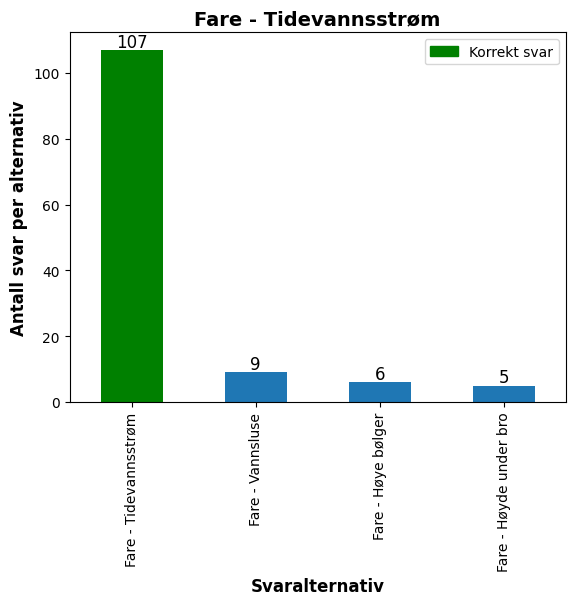

Riktige svar: 84.25 %


In [38]:
#TIDEVANNSSTRØM

response_map = {1: 'Fare - Høye bølger', 2: 'Fare - Vannsluse', 3: 'Fare - Høyde under bro', 0: 'Fare - Tidevannsstrøm'}
counts_tidevannsstrom = tidevannsstrom_df['tidevannsstrom'].map(response_map).value_counts()
print(counts_tidevannsstrom)

for option in response_map.values():
    if option not in counts_tidevannsstrom.index:
        counts_tidevannsstrom[option] = 0

# Create a bar chart of the response counts
ax = counts_tidevannsstrom.plot(kind='bar')

# Set the color of the correct answer bar to green
correct_answer = 'Fare - Tidevannsstrøm'
correct_answer_idx = counts_tidevannsstrom.map(response_map).index.get_loc(correct_answer)
ax.patches[correct_answer_idx].set_facecolor('green')


# Add text labels on top of each bar
for i, v in enumerate(counts_tidevannsstrom):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

green_patch = mpatches.Patch(color='green', label='Korrekt svar')
plt.legend(handles=[green_patch])

# Add a title
plt.title('Fare - Tidevannsstrøm', fontsize=14, fontweight = 'bold')

# Add axis labels
plt.xlabel('Svaralternativ', fontsize=12, fontweight = 'bold')
plt.ylabel('Antall svar per alternativ', fontsize=12, fontweight = 'bold')



# Display the chart
plt.savefig('Fare_Tidevannsstrom_Alle.png',bbox_inches = 'tight')
plt.show()


riktig_tidevannsstrom,riktigdf13 = correct_answers(tidevannsstrom_df,'tidevannsstrom')

In [39]:
print(droneforbudt_df)

                  droneforbudt
0                  droneforbud
1                Forbud droner
2      Ikke lov med helikopter
3    forbudt med droneflyvning
4                  droneforbud
..                         ...
122    Forbudt å fly med drone
123         Forbudt for drone.
124      Drone flyging forbudt
125           Forbod mot drone
126                Droneforbud

[127 rows x 1 columns]


## båndtvang og droneforbud åpne spørsmål ##

### Droneforbud spørsmålet manuell gjennomgang ###

In [40]:
#DRONEFORBUD

counts_droneforbudt = droneforbudt_df['droneforbudt'].value_counts()
counts_droneforbudt_df = pd.DataFrame({'Deltakers svar': counts_droneforbudt.index, 'Antall deltakere': counts_droneforbudt.values})

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(counts_droneforbudt)
    print(len(droneforbudt_df))


droneforbudt
Droneforbud                                                         27
Forbudt med drone                                                   15
Drone forbudt                                                        8
Forbud mot drone                                                     3
Ikke lov med drone                                                   3
Droneflyging forbudt                                                 3
droneforbud                                                          2
Forbudt for drone                                                    2
Ikke lov å fly drone                                                 2
Forbud mot bruk av drone                                             2
Droneflyving forbudt                                                 2
Forbud mot droner                                                    2
Forbudt å fly drone                                                  2
Ikkje lov med drone                                             

In [41]:
droneforbudt_riktige = 122

drone_feil = ['Forbud mot motorisert fartøy','Ikkje lov å klatre','Ikke lov med helikopter','0 peiling','Fareskilt']
riktigdf18 = pd.DataFrame([0 if val in drone_feil else 1 for val in droneforbudt_df['droneforbudt']], columns=['Drone-Forbudt'])


riktig_droneforbudt = round((droneforbudt_riktige/len(droneforbudt_df)*100),2)
table = counts_droneforbudt_df.to_latex(index=False, header=True, column_format='|c|c|c|')
print(table)



\begin{tabular}{|c|c|c|}
\toprule
Deltakers svar & Antall deltakere \\
\midrule
Droneforbud & 27 \\
Forbudt med drone & 15 \\
Drone forbudt & 8 \\
Forbud mot drone & 3 \\
Ikke lov med drone & 3 \\
Droneflyging forbudt & 3 \\
droneforbud & 2 \\
Forbudt for drone & 2 \\
Ikke lov å fly drone & 2 \\
Forbud mot bruk av drone & 2 \\
Droneflyving forbudt & 2 \\
Forbud mot droner & 2 \\
Forbudt å fly drone & 2 \\
Ikkje lov med drone & 2 \\
Ikke drone & 1 \\
Forbudt å fly med drone & 1 \\
Ikke tilst med drone & 1 \\
Drone flyging forbudt & 1 \\
Ikke lov med droner & 1 \\
Ikke lov å bruke drone & 1 \\
Forbudt for droneflyging & 1 \\
Forbudt å fly droner & 1 \\
Forbud med drone & 1 \\
Forbud mot motorisert fartøy & 1 \\
Forbudt for drone. & 1 \\
Ingen droner tillatt? & 1 \\
Ikkje lov å klatre & 1 \\
Ikkje lov med droner & 1 \\
Forbudt med droneflyvninf & 1 \\
Droneflyging forbode & 1 \\
Forbud mot å bruke droner & 1 \\
Droneforbud/flyforbudssone & 1 \\
Forbudt m droner & 1 \\
Ikke lov med Drone f

### Båndtvang spørsmålet manuell gjennomgang ###

In [42]:
#baandtvang

counts_baandtvang = baandtvang_df['baandtvang'].value_counts()
counts_baandtvang_df = pd.DataFrame({'Deltakers svar': counts_baandtvang.index, 'Antall deltakere': counts_baandtvang.values})

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(counts_baandtvang)


baandtvang
Båndtvang                              98
båndtvang                               3
Bandtvang                               3
Hund i bånd                             3
Førerhund                               2
Bånd tvang                              1
Båndplikt                               1
Hold hund i bånd                        1
Område hvor hunden må holdes i bånd     1
Band tvang                              1
Båndtvang/hold hunden i bånd            1
Båndtvang 😏                             1
.                                       1
Hundegård                               1
En hund som har på seg bånd             1
Hundepark                               1
hunden må være i bånd                   1
Hunder tillat men bare i bånd.          1
Hund skal være i band                   1
Turområde for hund                      1
Vetta faen                              1
Bikje i bånd                            1
Hund                                    1
Name: count, dtype: int

In [43]:
baandtvang_riktige = 119

baandtvang_feil = ['Førerhund','.','Hundegård','Hundepark','Turområde for hund', 'Vetta faen','Hund']
riktigdf19 = pd.DataFrame([0 if val in baandtvang_feil else 1 for val in baandtvang_df['baandtvang']], columns=['baandtvang'])


riktig_baandtvang = round((baandtvang_riktige/len(baandtvang_df))*100,2)


# assume you have a dataframe called df

# generate LaTeX code for the table
table = counts_baandtvang_df.to_latex(index=False, header=True, column_format='|c|c|c|')


# add horizontal lines after each row


# print the LaTeX code for the table
print(table)



\begin{tabular}{|c|c|c|}
\toprule
Deltakers svar & Antall deltakere \\
\midrule
Båndtvang & 98 \\
båndtvang & 3 \\
Bandtvang & 3 \\
Hund i bånd & 3 \\
Førerhund & 2 \\
Bånd tvang & 1 \\
Båndplikt & 1 \\
Hold hund i bånd & 1 \\
Område hvor hunden må holdes i bånd & 1 \\
Band tvang & 1 \\
Båndtvang/hold hunden i bånd & 1 \\
Båndtvang 😏 & 1 \\
. & 1 \\
Hundegård & 1 \\
En hund som har på seg bånd & 1 \\
Hundepark & 1 \\
hunden må være i bånd & 1 \\
Hunder tillat men bare i bånd. & 1 \\
Hund skal være i band & 1 \\
Turområde for hund & 1 \\
Vetta faen & 1 \\
Bikje i bånd & 1 \\
Hund & 1 \\
\bottomrule
\end{tabular}



In [44]:
print(sum(riktigdf19['baandtvang']))

119


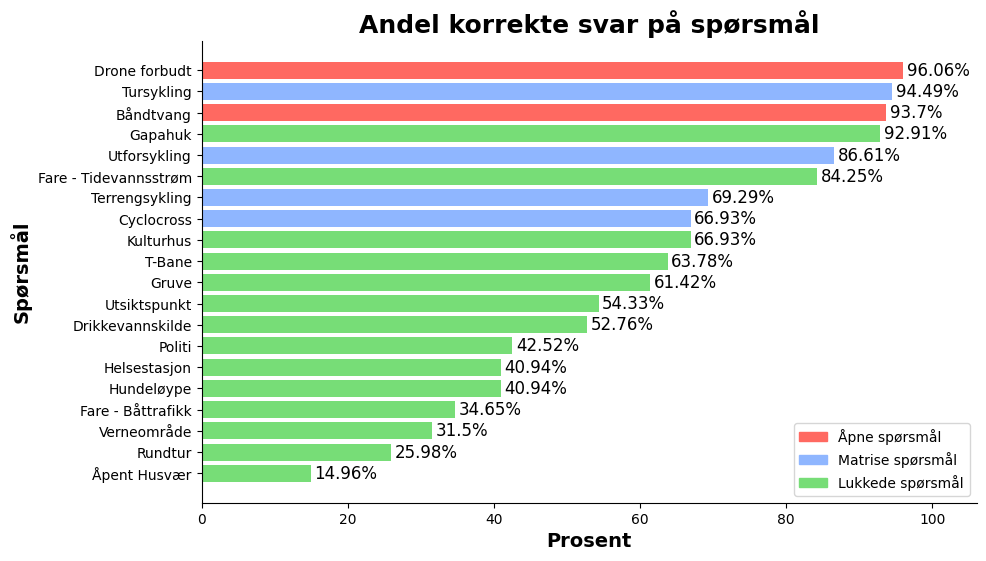

In [45]:
percentage_dict = {}
response_map = {'droneforbudt': 'Drone forbudt', 'baandtvang':'Båndtvang', 'gapahuk' : 'Gapahuk', 'tidevannsstrom':'Fare - Tidevannsstrøm', 'kulturhus':'Kulturhus' ,'tbane':'T-Bane','gruve':'Gruve','utsiktspunkt':'Utsiktspunkt','drikkevannskilde':'Drikkevannskilde','politi':'Politi', 'helsestasjon':'Helsestasjon','hunndeloeype':'Hundeløype','baattrafikk':'Fare - Båttrafikk','verneomrade':'Verneområde','rundtur':'Rundtur','aapenthusvaer':'Åpent Husvær','cyclocross':'Cyclocross','terrengsykling':'Terrengsykling','tursykling':'Tursykling','utforsykling':'Utforsykling'}
for sporsmal in sporsmål_list:
    percentage_dict[sporsmal] = eval('riktig_' + sporsmal)
colors =[]
percentage_dict = dict(sorted(percentage_dict.items(), key=lambda x: x[1], reverse=False))
# Create a list of colors for the bars
for q in list(percentage_dict.keys()):
    if q in ['baandtvang', 'droneforbudt']:
        colors.append('#FF6961')
    elif q in ['tursykling', 'utforsykling', 'cyclocross', 'terrengsykling']:
        colors.append('#8FB6FF') #FF6961
    else:
        colors.append('#77DD77')

# plot the percentages with the modified color list
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(percentage_dict)), list(percentage_dict.values()), color=colors)
ax.set_yticks(range(len(percentage_dict)))
ax.set_yticklabels([response_map[q] for q in percentage_dict.keys()])
ax.set_xlim(right=max(percentage_dict.values())+10)
ax.set_xlabel('Prosent', fontsize=14, fontweight='bold')
ax.set_ylabel('Spørsmål', fontsize=14, fontweight='bold')
ax.set_title('Andel korrekte svar på spørsmål', fontsize=18, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels on top of the bars
for i, v in enumerate(list(percentage_dict.values())):
    ax.text(v + 0.5, i, f'{v}%', va='center', fontsize=12)

# Add a background color to the chart
#fig.patch.set_facecolor('#f0f0f0')


# Define the color labels and assign them to the colors
color_labels = {
    '#FF6961': 'Åpne spørsmål',
    '#8FB6FF': 'Matrise spørsmål',
    '#77DD77': 'Lukkede spørsmål'
}

# Create the legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_labels.keys()]
labels = [color_labels[color] for color in color_labels.keys()]
plt.legend(handles, labels, loc='lower right')



plt.savefig('Alle_sporsmol_alle.png', bbox_inches='tight')
plt.show()

In [46]:
red_bars = [q for q in list(percentage_dict.keys()) if q in ['baandtvang', 'droneforbudt']]
yellow_bars = [q for q in list(percentage_dict.keys()) if q in ['tursykling', 'utforsykling', 'cyclocross', 'terrengsykling']]
green_bars = [q for q in list(percentage_dict.keys()) if q not in red_bars and q not in yellow_bars]
print(f"Red bars: {red_bars}")
print(f"Yellow bars: {yellow_bars}")
print(f"Green bars: {green_bars}")

Red bars: ['baandtvang', 'droneforbudt']
Yellow bars: ['cyclocross', 'terrengsykling', 'utforsykling', 'tursykling']
Green bars: ['aapenthusvaer', 'rundtur', 'verneomrade', 'baattrafikk', 'hunndeloeype', 'helsestasjon', 'politi', 'drikkevannskilde', 'utsiktspunkt', 'gruve', 'tbane', 'kulturhus', 'tidevannsstrom', 'gapahuk']


In [47]:
df_alle_riktig =pd.concat([riktigdf0, riktigdf1, riktigdf2,riktigdf3,riktigdf4,riktigdf5,riktigdf6,riktigdf7,riktigdf8,riktigdf9,riktigdf10,riktigdf11,riktigdf12,riktigdf13,riktigdf14,riktigdf15,riktigdf16,riktigdf17,riktigdf18,riktigdf19], axis=1)
participant_scores = (df_alle_riktig.mean(axis=1) * 100).round(2)
mean = participant_scores.mean()
test_score_std = participant_scores.std()
normal_dist = norm(loc=mean, scale=test_score_std)


# Calculate the score below which there is a 5% chance of reaching
score_below_5 = normal_dist.ppf(0.05)

# Calculate the score above which there is a 5% chance of reaching
score_above_5 = normal_dist.ppf(0.95)

print(score_below_5)
print(score_above_5)
print(test_score_std)


41.5000102972059
79.99605269492008
11.701965988627729


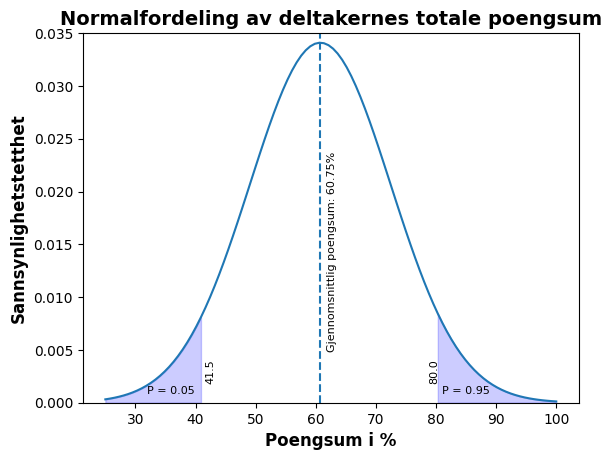

In [48]:

x = np.linspace(participant_scores.min(), participant_scores.max(), 100)
y = normal_dist.pdf(x)

plt.plot(x, y)
plt.title('Normalfordeling av deltakernes totale poengsum',fontsize = 14, fontweight = 'bold')
plt.xlabel('Poengsum i %',fontsize = 12, fontweight = 'bold')
plt.ylabel('Sannsynlighetstetthet',fontsize = 12, fontweight = 'bold')

# add shaded area for scores below 5%
plt.fill_between(x[x <= score_below_5], y[x <= score_below_5], color='blue', alpha=0.2)

# add shaded area for scores above 5%
plt.fill_between(x[x >= score_above_5], y[x >= score_above_5], color='blue', alpha=0.2)

# add text for areas
plt.text(32,0.0008,'P = 0.05',fontsize = 8)
plt.text(score_above_5-1.1,0.002,fontsize = 8, rotation = 90,s=round(score_above_5,2))
# add text for areas
plt.text(81,0.0008,'P = 0.95',fontsize = 8)
plt.text(score_below_5+0.1,0.002,fontsize = 8, rotation = 90,s=round(score_below_5,2))

# add vertical line for mean score
plt.axvline(mean, color='#1f77b4', linestyle='--', label='Gjennomsnittlig poengsum')
plt.text(mean + 0.1 * test_score_std, 0.005, f'Gjennomsnittlig poengsum: {mean:.2f}%', rotation=90,fontsize = 8)

plt.ylim(0.000,0.035)
#plt.xlim(0,100)
plt.savefig('normaldistrubusjon_alle.png', bbox_inches='tight')
plt.show()

In [49]:
prob = normal_dist.cdf(70)
print("Probability of score <= 70: ", prob*100)

# Calculate the z-score corresponding to 85%
z_score = (70 - mean) / test_score_std

# Calculate the probability of a score above 85%
prob_above_85 = 1 - norm.cdf(z_score)

print('The probability of a score above 85% is:', round(prob_above_85, 4)*100)



Probability of score <= 70:  78.54211082449406
The probability of a score above 85% is: 21.46


In [50]:


assosiative_dict = {"Tursykling":riktig_tursykling, "Båttrafikk":riktig_baattrafikk, "Hundeløype":riktig_hunndeloeype, "Helsestasjon":riktig_helsestasjon, "Drikkevannskilde":riktig_drikkevannskilde, "Kulturhus":riktig_kulturhus, "Gruve":riktig_gruve, "Verneområde":riktig_verneomrade, "Rundtur":riktig_rundtur, "T-Bane":riktig_tbane, "Utsiktpunkt":riktig_utsiktspunkt}
billedlige_dict = {"Politi":riktig_politi, "Gapahuk":riktig_gapahuk, "Cyclocross":riktig_cyclocross, "Utforsykling":riktig_utforsykling, "Terrengsykling":riktig_terrengsykling, "Tidevannsstrøm":riktig_tidevannsstrom, "Drone Forbudt": riktig_droneforbudt, "Båndtvang":riktig_baandtvang, "Åpent husvær":riktig_aapenthusvaer}


mean_value_ass = statistics.mean(assosiative_dict.values())
mean_value_bill = statistics.mean(billedlige_dict.values())

print(mean_value_ass)
print(mean_value_bill)

NameError: name 'statistics' is not defined

In [ ]:
# LAGRE PROSENT DICTONARY

import json

# Load the dictionary from the file
with open("assosiative_dict.json", "w") as f:
    json.dump(assosiative_dict,f)

with open("billedlige_dict.json", "w") as f:
    json.dump(billedlige_dict,f)